# Обработка результатов

In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
k = ['Orig', 0, 5]+ [10*i for i in range(1, 27)] + [263]
k_plot = [0, 0, 5]+ [10*i for i in range(1, 27)] + [263]
n = [0, 1, 2, 3, 4]

In [23]:
def get_graph(roc_tmp, title, columns):
    assert(len(columns) == len(roc_tmp))
    plt.figure(figsize=(18, 7))
    plt.plot(columns[1:], roc_tmp[1:], 'ro')
    plt.plot(columns[:1], roc_tmp[:1], 'bo')
    plt.xlabel('k')
    plt.ylabel('roc auc mean')
    plt.title(title)

In [4]:
def get_boxplot(roc_list, title , columns):
    tmp = np.hstack(roc_list)
    tmp = tmp.T
    assert(len(columns) == tmp.shape[1])
    dt = pd.DataFrame(tmp, columns=columns)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
    dt.plot.box(color=color, sym='r+',title=title, figsize=(18, 7))
    plt.xlabel('k')
    plt.ylabel('roc auc mean')

In [5]:
def get_roc_results(folder):
    roc_list = []
    for result_file in os.listdir(folder):
        result = pd.read_csv(folder + '/' + result_file)
        roc_list.append(result.as_matrix(["grid_roc_auc_mean"]))
    return roc_list

In [6]:
def Go_box(folder, title): get_boxplot(get_roc_results(folder), title, k)

In [14]:
def Go_plot(path, title):
    
    result = pd.read_csv(path).as_matrix(["grid_roc_auc_mean"])
    result = result.reshape(result.shape[0], )
    get_graph(result, title, k_plot)

## Построим Boxplot

**k** - исследумый параметр. Сколько данных можно выкинуть, уменьшая тем самым размерность. Т.е. после применения алгоритма, матрица (N, N) станет матрице (N, N - k)

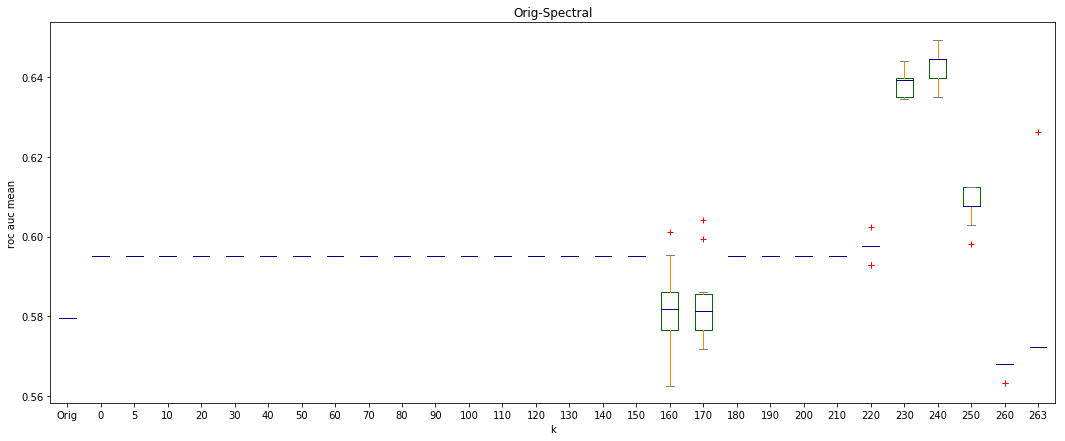

In [9]:
Go_box('Orig-Spectral_ofTheBest', 'Orig-Spectral')

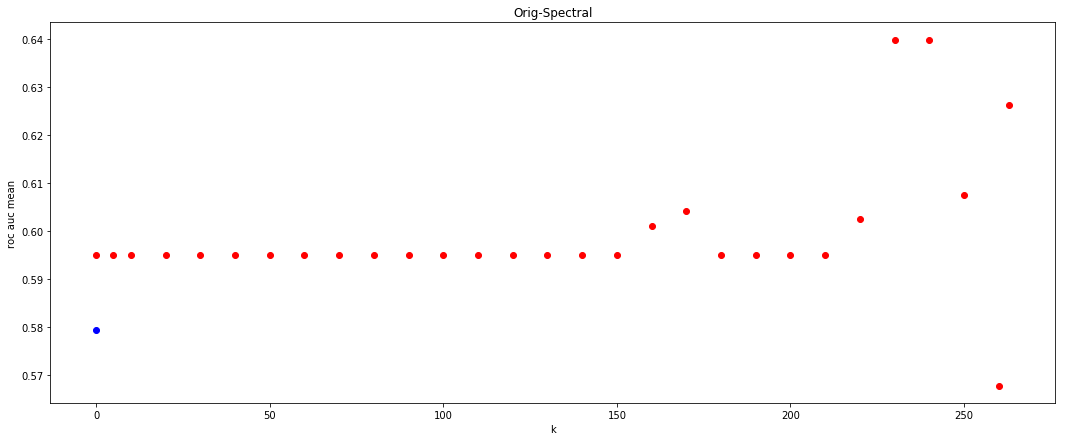

In [24]:
Go_plot('Orig-Spectral_ofTheBest/result_control.csv', 'Orig-Spectral')